In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv("Titanic Dataset\Titanic-Dataset.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\TESS\AppData\Local\Temp\ipykernel_9220\2928957002.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv("Titanic Dataset\Titanic-Dataset.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Exploratory Data Analysis

In [103]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Cleaning

In [106]:
# Cabin
train_data = data.drop("Cabin", axis = 1)

#Embarked
mode_value = train_data["Embarked"].mode()[0]
train_data["Embarked"].fillna(mode_value, inplace=True)

C:\Users\TESS\AppData\Local\Temp\ipykernel_9220\3085252987.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Embarked"].fillna(mode_value, inplace=True)


In [107]:
#Age
null_values_age = train_data[train_data["Age"].isnull()]
print(null_values_age)

import re
for i , name in enumerate( train_data['Name']):
    if re.search(r'Mr\.',string= str(name)) or re.search(r'Mrs\.',string= str(name)) or re.search(r'Dr\.',string= str(name)) and pd.isna(train_data.loc[i,'Age']):
        train_data.loc[i,'Age']= 35
    elif re.search(r'Miss',string= str(name)) or re.search(r'Master.',string= str(name)) and pd.isna(train_data.loc[i,'Age']):
        train_data.loc[i,'Age']= 17

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

In [108]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Preprocessing

In [109]:
# Data Encoding

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop = 'first', sparse_output=False)

encoded_sex = one_hot_encoder.fit_transform(train_data[['Sex']])
encoded_sex_df = pd.DataFrame(encoded_sex, columns=one_hot_encoder.get_feature_names_out(['Sex']))
train_data = pd.concat([train_data.drop('Sex',axis=1), encoded_sex_df], axis=1)
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  35.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  35.0      1      0   
2                               Heikkinen, Miss. Laina  17.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

In [110]:
encoded_embarked = one_hot_encoder.fit_transform(train_data[['Embarked']])
encoded_embarked_df = pd.DataFrame(encoded_embarked, columns=one_hot_encoder.get_feature_names_out(['Embarked']))
print(encoded_embarked_df)
train_data = pd.concat([train_data.drop('Embarked',axis=1), encoded_embarked_df], axis=1)
print(train_data)

     Embarked_Q  Embarked_S
0           0.0         1.0
1           0.0         0.0
2           0.0         1.0
3           0.0         1.0
4           0.0         1.0
..          ...         ...
886         0.0         1.0
887         0.0         1.0
888         0.0         1.0
889         0.0         0.0
890         1.0         0.0

[891 rows x 2 columns]
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  35.0      1      0   
1    Cumings, Mrs. John Bra

In [111]:
train_data = train_data.drop(['Name', 'Ticket'], axis=True)
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,35.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,35.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,17.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0
887,888,1,1,17.0,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,17.0,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,35.0,0,0,30.0000,1.0,0.0,0.0


<Axes: >

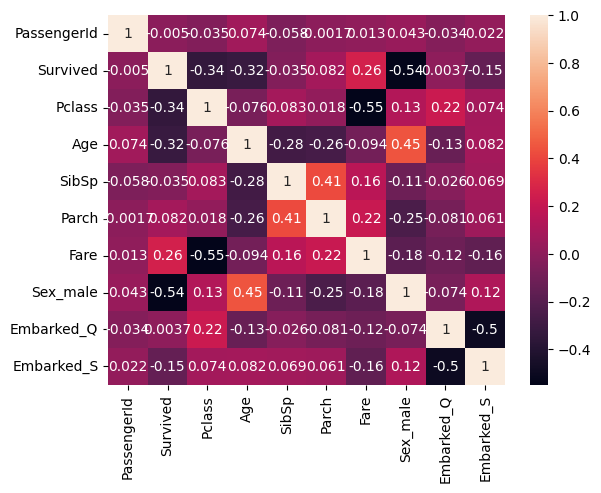

In [112]:
import seaborn as sns
sns.heatmap(train_data.corr(), annot=True)

In [113]:
train_data = train_data.drop(['Survived','SibSp','Parch'], axis = True)
train_data

,PassengerId,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,35.0,7.2500,1.0,0.0,1.0
1,2,1,35.0,71.2833,0.0,0.0,0.0
2,3,3,17.0,7.9250,0.0,0.0,1.0
3,4,1,35.0,53.1000,0.0,0.0,1.0
4,5,3,35.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...
886,887,2,27.0,13.0000,1.0,0.0,1.0
887,888,1,17.0,30.0000,0.0,0.0,1.0
888,889,3,17.0,23.4500,0.0,0.0,1.0
889,890,1,35.0,30.0000,1.0,0.0,0.0


In [114]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(train_data)

In [115]:
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Model Building

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [122]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNC',KNeighborsClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('SVC',SVC()))

In [123]:
results = []
names=[]

for name, model in models:
    kfold=StratifiedKFold(n_splits=4,random_state=1,shuffle=True)#crossvalidation
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("cv_results",cv_results)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))
    print("")

cv_results [0.79775281 0.80337079 0.81460674 0.74719101]
LR: 0.790730 (0.025859)

cv_results [0.76404494 0.74157303 0.76404494 0.73595506]
DTC: 0.751404 (0.012796)

cv_results [0.80898876 0.81460674 0.85393258 0.74719101]
KNC: 0.806180 (0.038206)

cv_results [0.83146067 0.81460674 0.85393258 0.78651685]
RFC: 0.821629 (0.024609)

cv_results [0.7752809  0.79213483 0.83707865 0.75842697]
GNB: 0.790730 (0.029293)

cv_results [0.85393258 0.82022472 0.84831461 0.79213483]
SVC: 0.828652 (0.024649)



In [126]:
#The better model is SVC, so let us perform grid search for best parameters

param={
    'C':[0.1,1,10,100],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto'],
    'degree':[2,3,4]
}


In [127]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param, refit = True, verbose = 3)
grid.fit(x,y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.804 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.803 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.787 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.787 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.659 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.781 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.685 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.702 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.719 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kerne

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [128]:
grid.best_score_

0.8271671583704727

In [129]:
grid.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [135]:
model = SVC(C = 1, degree = 2, gamma = 'scale', kernel = 'rbf')
model.fit(x_train,y_train)

SVC(C=1, degree=2)

In [136]:
y_pred = model.predict(x_test)

Model Evaluation

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

Accuracy: 0.8044692737430168
Precision: 0.8057942743161967
Recall: 0.8044692737430168
F1 Score: 0.7941204613538837


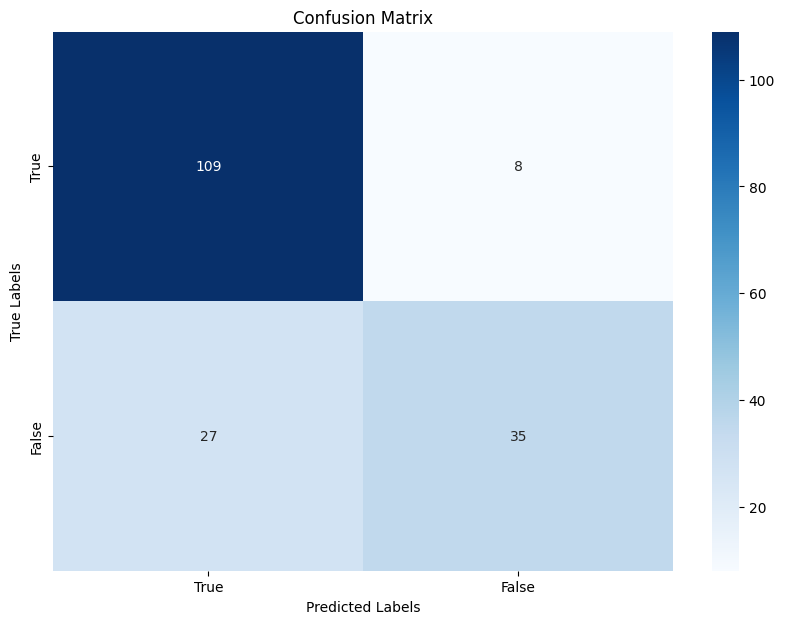

In [144]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['True', 'False'], 
            yticklabels=['True', 'False'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
